In [71]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
from collections import OrderedDict

ff1.Cache.enable_cache('2023Baku') 
fp = ff1.get_session(2023, 'Baku', 'S')
fp_laps = fp.load_laps(with_telemetry=True)
fp.load()

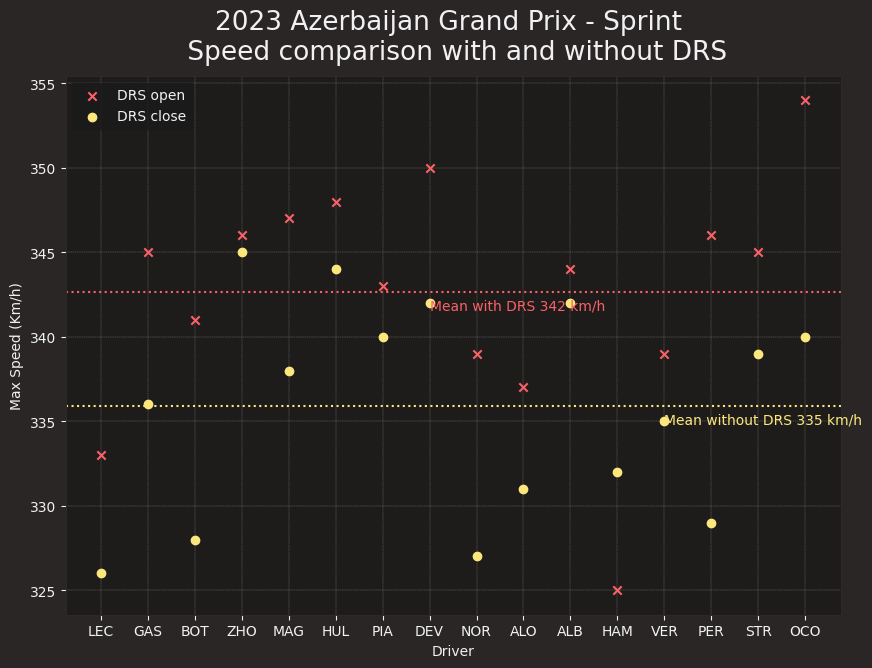

In [72]:
#ricavo la lista di tutti i piloti
drivers = pd.unique(fp.laps['Driver'])
#elimino i tempi in cui i piloti erano in giro in o out
fp_laps = fp_laps.loc[(fp_laps['PitOutTime'].isnull() & fp_laps['PitInTime'].isnull() & fp_laps['IsAccurate'] == True)]

max_speed_dict_drs = dict.fromkeys(drivers)
max_speed_dict_no_drs = dict.fromkeys(drivers)

for driver in drivers:
    if not driver == "TSU":
        if not driver == "SAI":
          if not driver == "RUS":
            df_drs_on = fp_laps.pick_driver(driver).get_car_data().loc[fp_laps.pick_driver(driver).get_car_data()['DRS'] % 2 == 0]
            df_drs_on = df_drs_on.loc[df_drs_on['DRS'] != 0]
            df_drs_on = df_drs_on.loc[df_drs_on['DRS'] != 8]
            #df_drs_on = df_drs_on.loc[df_drs_on['DRS'] != 2]

            df_drs_off = fp_laps.pick_driver(driver).get_car_data().loc[(fp_laps.pick_driver(driver).get_car_data()['DRS'] == 3) |
                                                              (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 1) |
                                                                (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 0)]
            #df_drs_off = df_drs_off.loc[df_drs_off['DRS'] != 3]
            max_speed_dict_drs[driver] = max(df_drs_on['Speed'])
            max_speed_dict_no_drs[driver] = max(df_drs_off['Speed'])

del max_speed_dict_drs['TSU']
del max_speed_dict_no_drs['TSU']
del max_speed_dict_drs['SAI']
del max_speed_dict_no_drs['SAI']
del max_speed_dict_drs['RUS']
del max_speed_dict_no_drs['RUS']

ff1.plotting.setup_mpl()
plt.figure(figsize=(10, 7))
plt.title(f"{fp.event.year} {fp.event.EventName} - {fp.name} \n Speed comparison with and without DRS")
plt.ylabel("Max Speed (Km/h)")
plt.xlabel("Driver")
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
plt.scatter(max_speed_dict_drs.keys(), max_speed_dict_drs.values(), color='#F96167', marker='x', label="DRS open")
plt.axhline(y=(sum(max_speed_dict_drs.values()) / len(max_speed_dict_drs)), color='#F96167', linestyle=':')
plt.annotate("Mean with DRS " + f"{int(sum(max_speed_dict_drs.values()) / len(max_speed_dict_drs))} km/h", xy=("DEV", (sum(max_speed_dict_drs.values()) / len(max_speed_dict_drs))-1), color='#F96167')

plt.scatter(max_speed_dict_no_drs.keys(), max_speed_dict_no_drs.values(), color='#FCE77D', marker='o', label="DRS close")
plt.axhline(y=(sum(max_speed_dict_no_drs.values()) / len(max_speed_dict_no_drs)), color='#FCE77D', linestyle=':')
plt.annotate("Mean without DRS " + f"{int(sum(max_speed_dict_no_drs.values()) / len(max_speed_dict_no_drs))} km/h", xy=("VER", (sum(max_speed_dict_no_drs.values()) / len(max_speed_dict_no_drs))-1), color='#FCE77D')
plt.legend()

In [44]:
#ricavo la lista di tutti i piloti
drivers = pd.unique(fp.laps['Driver'])
#elimino i tempi in cui i piloti erano in giro in o out
fp_laps = fp_laps.loc[(fp_laps['PitOutTime'].isnull() & fp_laps['PitInTime'].isnull() & fp_laps['IsAccurate'] == True)]

max_speed_dict_drs = dict.fromkeys(drivers)
max_speed_dict_no_drs = dict.fromkeys(drivers)

#df_drs_off = ([x for _, x in fp_laps.pick_driver("PER").get_car_data().groupby(fp_laps.pick_driver("PER").get_car_data()['DRS'] % 2 == 0)])

df_drs_on = fp_laps.pick_driver("VER").get_car_data()[fp_laps.pick_driver("VER").get_car_data()['DRS'] % 2 == 0]
df_drs_on = df_drs_on[df_drs_on['DRS'] != 0]
df_drs_on

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime
756,2023-04-29 13:51:32.949,11435,323,8,100,False,8,car,0 days 00:03:21.684000,0 days 01:02:51.080000
757,2023-04-29 13:51:33.109,11447,323,8,100,False,8,car,0 days 00:03:21.844000,0 days 01:02:51.240000
758,2023-04-29 13:51:33.389,11387,323,8,100,False,8,car,0 days 00:03:22.124000,0 days 01:02:51.520000
759,2023-04-29 13:51:33.548,11485,324,8,100,False,8,car,0 days 00:03:22.283000,0 days 01:02:51.679000
760,2023-04-29 13:51:33.748,11460,324,8,100,False,8,car,0 days 00:03:22.483000,0 days 01:02:51.879000
...,...,...,...,...,...,...,...,...,...,...
4274,2023-04-29 14:07:19.792,11715,333,8,100,False,12,car,0 days 00:19:08.527000,0 days 01:18:37.923000
4275,2023-04-29 14:07:19.992,11766,333,8,100,False,12,car,0 days 00:19:08.727000,0 days 01:18:38.123000
4276,2023-04-29 14:07:20.232,11750,332,8,100,False,12,car,0 days 00:19:08.967000,0 days 01:18:38.363000
4277,2023-04-29 14:07:20.672,11743,332,8,100,False,12,car,0 days 00:19:09.407000,0 days 01:18:38.803000


In [50]:
df_drs_off = fp_laps.pick_driver("LEC").get_car_data().loc[(fp_laps.pick_driver("LEC").get_car_data()['DRS'] % 2 == 3) |
                                                           (fp_laps.pick_driver("LEC").get_car_data()['DRS'] % 2 == 1) |
                                                             (fp_laps.pick_driver("LEC").get_car_data()['DRS'] % 2 == 0)]
df_drs_off

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime
0,2023-04-29 13:48:09.988,11282,318,8,100,False,0,car,0 days 00:00:00.174000,0 days 00:59:28.119000
1,2023-04-29 13:48:10.228,11287,317,8,99,False,0,car,0 days 00:00:00.414000,0 days 00:59:28.359000
2,2023-04-29 13:48:10.428,11225,316,8,100,False,0,car,0 days 00:00:00.614000,0 days 00:59:28.559000
3,2023-04-29 13:48:10.748,11195,315,8,99,False,0,car,0 days 00:00:00.934000,0 days 00:59:28.879000
4,2023-04-29 13:48:11.188,11114,314,8,99,False,0,car,0 days 00:00:01.374000,0 days 00:59:29.319000
...,...,...,...,...,...,...,...,...,...,...
4277,2023-04-29 14:07:19.312,11079,312,8,100,False,0,car,0 days 00:19:09.498000,0 days 01:18:37.443000
4278,2023-04-29 14:07:19.512,11079,312,8,100,False,0,car,0 days 00:19:09.698000,0 days 01:18:37.643000
4279,2023-04-29 14:07:19.792,11061,312,8,100,False,0,car,0 days 00:19:09.978000,0 days 01:18:37.923000
4280,2023-04-29 14:07:19.992,11055,311,8,100,False,0,car,0 days 00:19:10.178000,0 days 01:18:38.123000
